In [1]:
import numpy as np

In [2]:
def binSplitDataSet(dataSet,feature,value):
    mat0=dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
    mat1=dataSet[np.nonzero(dataSet[:,feature]<=value)[0],:]
    return mat0,mat1

In [3]:
testMat=np.mat(np.eye(4))
mat0,mat1=binSplitDataSet(testMat,1,0.5)
print('原始集合:\n',testMat)
print('mat0:\n',mat0)
print('mat1:\n',mat1)

原始集合:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
mat0:
 [[0. 1. 0. 0.]]
mat1:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def loadDataSet(fileName):
    dataMat=[]
    fr=open(fileName)
    for line in fr.readlines():
        curline=line.strip().split('\t')
        fleLine=list(map(float,curline))
        dataMat.append(fleLine)
    return dataMat

In [7]:
def plotDataSet(fileName):
    dataMat=loadDataSet(fileName)
    n=len(dataMat)
    xcord=[]
    ycord=[]
    for i in range(n):
        xcord.append(dataMat[i][0])
        ycord.append(dataMat[i][1])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord,ycord,s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')

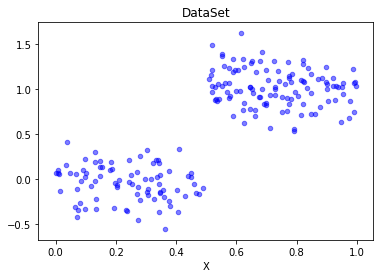

In [8]:
fileName='ex00.txt'
plotDataSet(fileName)

In [10]:
def binSplitDataSet(dataSet,feature,value):
    mat0=dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
    mat1=dataSet[np.nonzero(dataSet[:,feature]<=value)[0],:]
    return mat0,mat1

In [11]:
def regLeaf(dataSet):
    return np.mean(dataSet[:,-1])

In [12]:
def regErr(dataSet):
    return np.var(dataSet[:,-1])*np.shape(dataSet)[0]

In [16]:
def chooseBestSplit(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    import types
    tolS=ops[0]
    tolN=ops[1]
    if len(set(dataSet[:,-1].T.tolist()[0]))==1:
        return None,leafType(dataSet)
    m,n=np.shape(dataSet)
    S=errType(dataSet)
    bestS=float('inf')
    bestIndex=0
    bestValues=0
    for featIndex in range(n-1):
        for splitVal in set(dataSet[:,featIndex].T.A.tolist()[0]):
            mat0,mat1=binSplitDataSet(dataSet,featIndex,splitVal)
            if (np.shape(mat0)[0]<tolN) or (np.shape(mat1)[0]<tolN):
                continue
            newS=errType(mat0)+errType(mat1)
            if newS<bestS:
                bestIndex=featIndex
                bestValues=splitVal
                bestS=newS
    if (S-bestS)<tolS:
        return None,leafType(dataSet)
    mat0,mat1=binSplitDataSet(dataSet,bestIndex,bestValues)
    if (np.shape(mat0)[0]<tolN) or (np.shape(mat1)[0]<tolN):
        return None,leafType(dataSet)
    return bestIndex,bestValues

In [17]:
myDat = loadDataSet('ex00.txt')
myMat = np.mat(myDat)
feat, val = chooseBestSplit(myMat, regLeaf, regErr, (1, 4))
print(feat)
print(val)

0
0.48813


In [18]:
def createTree(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    feat,val=chooseBestSplit(dataSet,leafType,errType,ops)
    if feat==None:
        return val
    retTree={}
    retTree['spInd']=feat
    retTree['spVal']=val
    lSet,rSet=binSplitDataSet(dataSet,feat,val)
    retTree['left']=createTree(lSet,leafType,errType,ops)
    retTree['right']=createTree(rSet,leafType,errType,ops)
    return retTree

In [19]:
myDat = loadDataSet('ex00.txt')
myMat = np.mat(myDat)
print(createTree(myMat))

{'spInd': 0, 'spVal': 0.48813, 'left': 1.0180967672413792, 'right': -0.04465028571428572}


In [21]:
def plotDataSet(fileName):
    dataMat=loadDataSet(fileName)
    n=len(dataMat)
    xcord=[]
    ycord=[]
    for i in range(n):
        xcord.append(dataMat[i][1])
        ycord.append(dataMat[i][2])
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord,ycord,s=20,c='blue',alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')

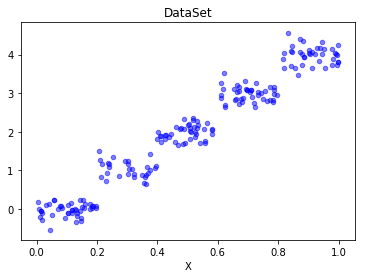

In [22]:
fileName='ex0.txt'
plotDataSet(fileName)

In [23]:
fileName='ex0.txt'
myDat=loadDataSet(fileName)
myMat=np.mat(myDat)
print(createTree(myMat))

{'spInd': 1, 'spVal': 0.39435, 'left': {'spInd': 1, 'spVal': 0.582002, 'left': {'spInd': 1, 'spVal': 0.797583, 'left': 3.9871632, 'right': 2.9836209534883724}, 'right': 1.980035071428571}, 'right': {'spInd': 1, 'spVal': 0.197834, 'left': 1.0289583666666666, 'right': -0.023838155555555553}}


In [24]:
fileName='ex2.txt'
myDat=loadDataSet(fileName)
myMat=np.mat(myDat)
print(createTree(myMat))

{'spInd': 0, 'spVal': 0.499171, 'left': {'spInd': 0, 'spVal': 0.729397, 'left': {'spInd': 0, 'spVal': 0.952833, 'left': {'spInd': 0, 'spVal': 0.958512, 'left': 105.24862350000001, 'right': 112.42895575000001}, 'right': {'spInd': 0, 'spVal': 0.759504, 'left': {'spInd': 0, 'spVal': 0.790312, 'left': {'spInd': 0, 'spVal': 0.833026, 'left': {'spInd': 0, 'spVal': 0.944221, 'left': 87.3103875, 'right': {'spInd': 0, 'spVal': 0.85497, 'left': {'spInd': 0, 'spVal': 0.910975, 'left': 96.452867, 'right': {'spInd': 0, 'spVal': 0.892999, 'left': 104.825409, 'right': {'spInd': 0, 'spVal': 0.872883, 'left': 95.181793, 'right': 102.25234449999999}}}, 'right': 95.27584316666666}}, 'right': {'spInd': 0, 'spVal': 0.811602, 'left': 81.110152, 'right': 88.78449880000001}}, 'right': 102.35780185714285}, 'right': 78.08564325}}, 'right': {'spInd': 0, 'spVal': 0.640515, 'left': {'spInd': 0, 'spVal': 0.666452, 'left': {'spInd': 0, 'spVal': 0.706961, 'left': 114.554706, 'right': {'spInd': 0, 'spVal': 0.698472, '

In [26]:
fileName='ex2.txt'
myDat=loadDataSet(fileName)
myMat=np.mat(myDat)
print(createTree(myMat,ops=(10000,4)))

{'spInd': 0, 'spVal': 0.499171, 'left': 101.35815937735848, 'right': -2.637719329787234}


In [28]:
def isTree(obj):
    import types
    return (type(obj).__name__=='dict')
def getMean(tree):
    if isTree(tree['right']):
        tree['right']=getMean(tree['right'])
    if isTree(tree['left']):
        tree['left']=getMean(tree['left'])
    return (tree['left']+tree['right'])/2.0
def prune(tree,testData):
    if np.shape(testData)[0] == 0: return getMean(tree)
    #如果有左子树或者右子树,则切分数据集
    if (isTree(tree['right']) or isTree(tree['left'])):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
    #处理左子树(剪枝)
    if isTree(tree['left']): tree['left'] = prune(tree['left'], lSet)
    #处理右子树(剪枝)
    if isTree(tree['right']): tree['right'] =  prune(tree['right'], rSet)
    #如果当前结点的左右结点为叶结点
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitDataSet(testData, tree['spInd'], tree['spVal'])
        #计算没有合并的误差
        errorNoMerge = np.sum(np.power(lSet[:,-1] - tree['left'],2)) + np.sum(np.power(rSet[:,-1] - tree['right'],2))
        #计算合并的均值
        treeMean = (tree['left'] + tree['right']) / 2.0
        #计算合并的误差
        errorMerge = np.sum(np.power(testData[:,-1] - treeMean, 2))
        #如果合并的误差小于没有合并的误差,则合并
        if errorMerge < errorNoMerge:
            return treeMean
        else: return tree
    else: return tree

In [32]:
train_filename = 'ex2.txt'
train_Data = loadDataSet(train_filename)
train_Mat = np.mat(train_Data)
tree = createTree(train_Mat)
print(tree)
print('*'*70)
test_filename = 'ex2test.txt'
test_Data = loadDataSet(test_filename)
test_Mat = np.mat(test_Data)
print(prune(tree, test_Mat))

{'spInd': 0, 'spVal': 0.499171, 'left': {'spInd': 0, 'spVal': 0.729397, 'left': {'spInd': 0, 'spVal': 0.952833, 'left': {'spInd': 0, 'spVal': 0.958512, 'left': 105.24862350000001, 'right': 112.42895575000001}, 'right': {'spInd': 0, 'spVal': 0.759504, 'left': {'spInd': 0, 'spVal': 0.790312, 'left': {'spInd': 0, 'spVal': 0.833026, 'left': {'spInd': 0, 'spVal': 0.944221, 'left': 87.3103875, 'right': {'spInd': 0, 'spVal': 0.85497, 'left': {'spInd': 0, 'spVal': 0.910975, 'left': 96.452867, 'right': {'spInd': 0, 'spVal': 0.892999, 'left': 104.825409, 'right': {'spInd': 0, 'spVal': 0.872883, 'left': 95.181793, 'right': 102.25234449999999}}}, 'right': 95.27584316666666}}, 'right': {'spInd': 0, 'spVal': 0.811602, 'left': 81.110152, 'right': 88.78449880000001}}, 'right': 102.35780185714285}, 'right': 78.08564325}}, 'right': {'spInd': 0, 'spVal': 0.640515, 'left': {'spInd': 0, 'spVal': 0.666452, 'left': {'spInd': 0, 'spVal': 0.706961, 'left': 114.554706, 'right': {'spInd': 0, 'spVal': 0.698472, '

In [33]:
def lineaSovle(dataSet):
    m,n=np.shape(dataSet)
    X=np.mat(np.ones((m,n)))
    Y=np.mat(np.ones((m,1)))
    X[:,1:n]=dataSet[:,0:n-1]
    Y=dataSet[:,-1]
    xTx=X.T*X
    if np.linalg.det(xTx)==0.0:
        print('矩阵不可逆')
    ws=xTx.I*(X.T*Y)
    return ws,X,Y
def modelLeaf(dataSet):
    ws,X,Y=lineaSovle(dataSet)
    return ws
def modelErr(dataSet):
    ws,X,Y=lineaSovle(dataSet)
    yHat=X*ws
    return sum(np.power(Y-yHat,2))

In [38]:
myDat=loadDataSet('exp2.txt')
myMat=np.mat(myDat)
modeltree=createTree(myMat,modelLeaf,modelErr,(1,10))
print(modeltree)

{'spInd': 0, 'spVal': 0.285477, 'left': matrix([[1.69855694e-03],
        [1.19647739e+01]]), 'right': matrix([[3.46877936],
        [1.18521743]])}


In [58]:
def plotDataSet(fileName):
    dataMat=loadDataSet(fileName)
    n=len(dataMat)
    xcord=[]
    ycord=[]
    for i in range(n):
        xcord.append(dataMat[i][0])
        ycord.append(dataMat[i][1])
    m=len(xcord)
    X=np.ones((m,2))
    X[:,1]=xcord
    Y1=X*modeltree['left']
    Y2=X*modeltree['right']
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord,ycord,s=20,c='blue',alpha=.5)
    ax.plot(xcord,Y1)
    ax.plot(xcord,Y2)
    plt.title('DataSet')
    plt.xlabel('X')

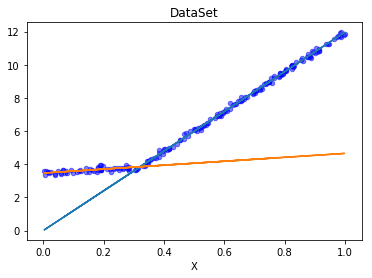

In [59]:
plotDataSet('exp2.txt')

In [70]:
def regTreeEval(model,inDat):
    return float(model)
def modelTreeEval(model,inDat):
    n=np.shape(inDat)[1]
    X=np.mat(np.ones(1,n+1))
    X[:,1:n+1]=inDat
    return float(X*model)
def treeForeCast(tree,inDat,modelEval=regTreeEval):
    if not isTree(tree): return modelEval(tree,inDat)
    if (inDat[tree['spInd']]-tree['spVal']).any():
        if isTree(tree['left']):
            return treeForeCast(tree['left'],inDat,modelEval)
        else:
            return modelEval(tree['left'],inDat)
    else:
        if isTree(tree['right']):
            return treeForeCast(tree['right'],inDat,modelEval)
        else:
            return modelEval(tree['right'],inDat)
def createForeCast(tree,testData,modelEval=regTreeEval):
    m=len(test_Data)
    yHat=np.mat(np.zeros((m,1)))
    for i in range(m):
        yHat[i,0]=treeForeCast(tree,np.mat(test_Data[i]),modelEval)
    return yHat

In [71]:
trainMat=np.mat(loadDataSet('bikeSpeedVsIq_train.txt'))
testMat=np.mat(loadDataSet('bikeSpeedVsIq_test.txt'))
myTree=createTree(train_Mat,ops=(1,20))
yHat=createForeCast(myTree,testMat[:,0])
np.corrcoef(yHat,testMat[:,1],rowvar=0)[0,1]

4.207666451996599e-17